# Quickstart

In [1]:
%load_ext nb_black

import scdiffeq as sdq

<IPython.core.display.Javascript object>

Let's start with the LARRY dataset so we can see the contrast in setting up the model with real time as opposed to setting up the model where we don't have the time.

## Load data

In [2]:
h5ad_path = "../notebooks/folder_01/adata.task_01.Weinreb2020.h5ad"
adata_LARRY = sdq.io.read_h5ad(h5ad_path)

AnnData object with n_obs × n_vars = 130887 × 2447
    obs: 'Time point', 'Population', 'Annotation', 'Well', 'cell_idx', 'clone_idx', 'early_cells', 'early_neu_mo', 'neu_mo_mask', 'neu_vs_mo_pct', 'group', 'W', 'train', 'test'
    obsm: 'X_pca', 'X_umap'
    layers: 'X_scaled'


<IPython.core.display.Javascript object>

## Define `SDE`

In [3]:
from neural_diffeqs import NeuralSDE

SDE = NeuralSDE(
    state_size=50,
    mu_hidden=[800, 800],
    sigma_hidden=[100, 100],
    mu_dropout=[0.2],
    sigma_dropout=[0.2],
)
SDE

NeuralSDE(
  (mu): Sequential(
    (hidden_1): Sequential(
      (linear): Linear(in_features=50, out_features=800, bias=True)
      (dropout): Dropout(p=0.2, inplace=False)
      (activation): LeakyReLU(negative_slope=0.01)
    )
    (hidden_2): Sequential(
      (linear): Linear(in_features=800, out_features=800, bias=True)
      (dropout): Dropout(p=0.2, inplace=False)
      (activation): LeakyReLU(negative_slope=0.01)
    )
    (output): Sequential(
      (linear): Linear(in_features=800, out_features=50, bias=True)
    )
  )
  (sigma): Sequential(
    (hidden_1): Sequential(
      (linear): Linear(in_features=50, out_features=100, bias=True)
      (dropout): Dropout(p=0.2, inplace=False)
      (activation): LeakyReLU(negative_slope=0.01)
    )
    (hidden_2): Sequential(
      (linear): Linear(in_features=100, out_features=100, bias=True)
      (dropout): Dropout(p=0.2, inplace=False)
      (activation): LeakyReLU(negative_slope=0.01)
    )
    (output): Sequential(
      (linear)

<IPython.core.display.Javascript object>

## Define the `t0_idx`

In [4]:
t0_idx = adata_LARRY.obs.loc[adata_LARRY.obs["early_cells"] == 1].index

<IPython.core.display.Javascript object>

Setup the model (real time)

In [5]:
model = sdq.scDiffEq(
    adata=adata_LARRY, func=SDE, model_name="time_free_dev", time_key="Time point"
)

<IPython.core.display.Javascript object>

Print the `time_attributes` to see how the model set up time when given `time_key`:

In [6]:
model.time_attributes

{'time_key': 'Time point',
 't': tensor([2., 4., 6.]),
 't_min': 2.0,
 't_max': 6.0,
 't_span': 4.0,
 'dt': 0.1,
 'n_steps': 41}

<IPython.core.display.Javascript object>

Set up the model (no time):

In [7]:
model = sdq.scDiffEq(
    adata=adata_LARRY, func=SDE, model_name="time_free_dev", t0_idx=t0_idx
)

<IPython.core.display.Javascript object>

Print the `time_attributes` to see how the model set up time when given `t0_idx`:

In [8]:
model.time_attributes

{'time_key': 't',
 't': tensor([0.0000, 0.0250, 0.0500, 0.0750, 0.1000, 0.1250, 0.1500, 0.1750, 0.2000,
         0.2250, 0.2500, 0.2750, 0.3000, 0.3250, 0.3500, 0.3750, 0.4000, 0.4250,
         0.4500, 0.4750, 0.5000, 0.5250, 0.5500, 0.5750, 0.6000, 0.6250, 0.6500,
         0.6750, 0.7000, 0.7250, 0.7500, 0.7750, 0.8000, 0.8250, 0.8500, 0.8750,
         0.9000, 0.9250, 0.9500, 0.9750, 1.0000]),
 't0_idx': Index(['13193', '13203', '13210', '13211', '13220', '13227', '13268', '13307',
        '13312', '13313',
        ...
        '69052', '69065', '69071', '69113', '69116', '69120', '69140', '69216',
        '69222', '69287'],
       dtype='object', length=13033),
 't_min': 0.0,
 't_max': 1.0,
 't_span': 1.0,
 'dt': 0.025,
 'n_steps': 41}

<IPython.core.display.Javascript object>

In [9]:
# model.fit()

<IPython.core.display.Javascript object>

Load the pancreas data from the scvelo tutorial

In [10]:
adata_pancreas = sdq.io.read_h5ad(
    "../notebooks/data/Pancreas/endocrinogenesis_day15.h5ad"
)

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'


/home/mvinyard/anaconda3/envs/sdq/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/mvinyard/anaconda3/envs/sdq/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


<IPython.core.display.Javascript object>

Let's load the `adata_pancreas` from the `scvelo` tutorial

## Plots wtih scVelo

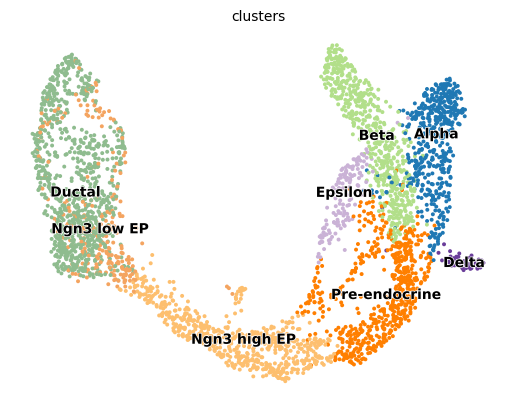

<IPython.core.display.Javascript object>

In [11]:
import scvelo as scv

adata_pancreas = scv.datasets.pancreas()
scv.pl.umap(adata_pancreas)

We'll call the ductal cells `X(t0)`.

In [12]:
adata_pancreas.obs = adata_pancreas.obs.reset_index()

<IPython.core.display.Javascript object>

In [13]:
adata_pancreas.obs["train"] = True
t0_idx = adata_pancreas.obs.loc[adata_pancreas.obs["clusters"] == "Ductal"].index

<IPython.core.display.Javascript object>

In [14]:
model = sdq.scDiffEq(
    adata=adata_pancreas,
    func=SDE,
    model_name="pancreas",
    t0_idx=t0_idx,
    batch_size=200,
)

<IPython.core.display.Javascript object>

In [15]:
model.fit()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type               | Params
-------------------------------------------------
0 | func      | NeuralSDE          | 741 K 
1 | loss_func | SinkhornDivergence | 0     
-------------------------------------------------
741 K     Trainable params
0         Non-trainable params
741 K     Total params
2.968     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Exception ignored in: <function _after_fork at 0x7f1f2ae0ff70>
Traceback (most recent call last):
  File "/home/mvinyard/anaconda3/envs/sdq/lib/python3.9/threading.py", line 1545, in _after_fork
    thread._reset_internal_locks(False)
  File "/home/mvinyard/anaconda3/envs/sdq/lib/python3.9/threading.py", line 852, in _reset_internal_locks
    self._started._at_fork_reinit()
  File "/home/mvinyard/anaconda3/envs/sdq/lib/python3.9/threading.py", line 534, in _at_fork_reinit
    self._cond._at_fork_reinit()
  File "/home/mvinyard/anaconda3/envs/sdq/lib/python3.9/threading.py", line 254, in _at_fork_reinit
    self._waiters.clear()
KeyboardInterrupt: 
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1e63944f70>
Traceback (most recent call last):
  File "/home/mvinyard/anaconda3/envs/sdq/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/home/mvinyard/anaconda3/envs/sdq/lib/python3.9/site-pack

<IPython.core.display.Javascript object>

On fitting, you'll notice a large loss here, if you take every time step under consideration. I think that's ok, depending on the data.

In [16]:
import torch

<IPython.core.display.Javascript object>

In [20]:
X0 = torch.Tensor(adata_pancreas[t0_idx].obsm["X_pca"]).to("cuda:0")
X0.shape

torch.Size([916, 50])

<IPython.core.display.Javascript object>

In [24]:
t = torch.Tensor(model.time_attributes["t"])

<IPython.core.display.Javascript object>

In [25]:
X_hat = model.simulate(X0, t)

<IPython.core.display.Javascript object>

Fit a UMAP model to the dataset

In [29]:
import umap
import numpy as np

umap_model = umap.UMAP(n_components=2)
X_umap_ = umap_model.fit_transform(adata_pancreas.obsm["X_pca"])

<IPython.core.display.Javascript object>

Project the predicted `X_hat` into UMAP space

In [ ]:
X_hat_ = X_hat.detach().cpu().numpy()
X_hat_umap = [umap_model.transform(x) for x in X_hat_]
X_hat_umap = np.stack(X_hat_umap)

In [40]:
obs_df = adata_pancreas.obs.copy()

<IPython.core.display.Javascript object>

In [47]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

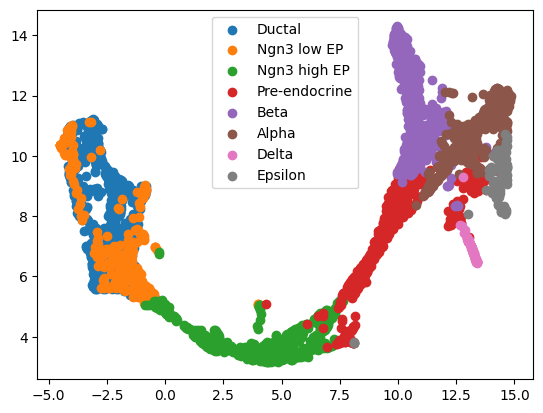

<IPython.core.display.Javascript object>

In [50]:
for group, group_df in obs_df.groupby("clusters"):
    idx = group_df.index.astype(int)
    plt.scatter(X_umap_[idx, 0], X_umap_[idx, 1], label=group)
plt.legend()

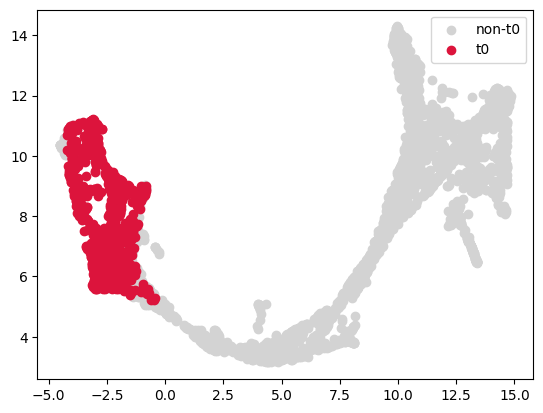

<IPython.core.display.Javascript object>

In [55]:
for group, group_df in obs_df.groupby("t0"):
    if group:
        label, c = "t0", "crimson"
    else:
        label, c = "non-t0", "lightgrey"
    idx = group_df.index.astype(int)
    plt.scatter(X_umap_[idx, 0], X_umap_[idx, 1], label=label, c=c)
plt.legend()

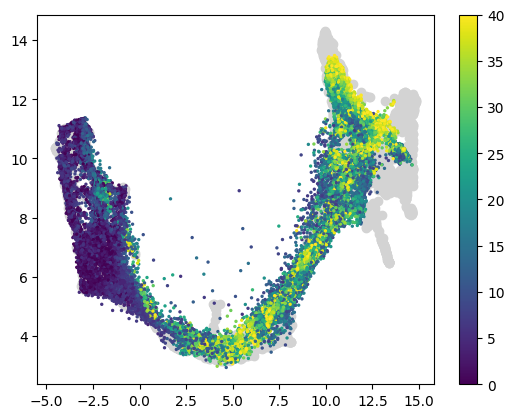

<IPython.core.display.Javascript object>

In [82]:
plt.scatter(X_umap_[:, 0], X_umap_[:, 1], c="lightgrey")
x_s = [
    plt.scatter(X_hat_umap[:, j, 0], X_hat_umap[:, j, 1], c=range(41), zorder=3, s=2)
    for j in range(X_hat_umap.shape[1])
]
plt.colorbar()

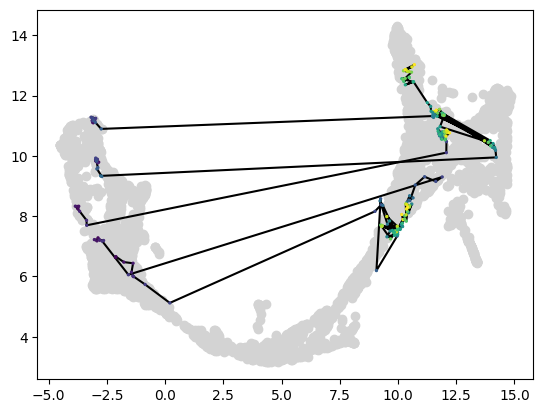

<IPython.core.display.Javascript object>

In [83]:
plt.scatter(X_umap_[:, 0], X_umap_[:, 1], c="lightgrey")
x_p = [
    plt.plot(X_hat_umap[:, j, 0], X_hat_umap[:, j, 1], c="k", zorder=2)
    for j in range(5)
]

x_s = [
    plt.scatter(X_hat_umap[:, j, 0], X_hat_umap[:, j, 1], c=range(41), zorder=3, s=2)
    for j in range(5)
]